In [1]:
from SimPEG import Utils, Maps, Mesh
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# temp = np.loadtxt("../data/pohang/dem.dat")
# inds = np.logical_and(temp[:,0]>230000, temp[:,0]<233000) & np.logical_and(temp[:,1]>286500, temp[:,1]<289500)
# topo = temp[inds,:]
# np.save("../data/pohang/topo", topo)

In [3]:
topo = np.load("../data/pohang/topo.npy")

In [4]:
# temp = np.loadtxt("../data/pohang/SP_cor_allf.dat")
fid = open("../data/pohang/SP_cor_allf.dat")
lines = fid.readlines()
temp = []
for line in lines:
    if len(line.split()) == 4:
        temp.append(map(float, line.split()[1:]))
    else:
        print "skip data"
        print line
data = np.vstack(temp)        

skip data
104 231829.19 287921.942

skip data
105 231785.361 287857.776

skip data
106 231579.282 287644.466

skip data
107 231381.452 287595.053

skip data
108 230335.09 287191.47

skip data
406 "230174.673  " 287802.615406 -7.72



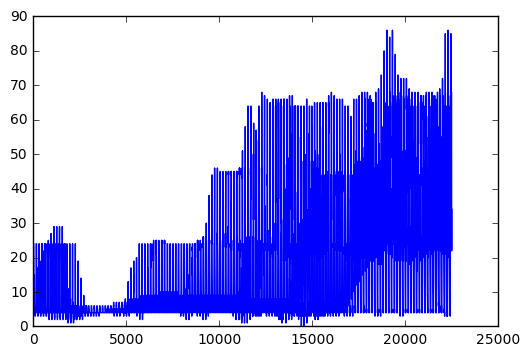

In [37]:
plt.plot(topo[:,2]-topo[:,2].min())

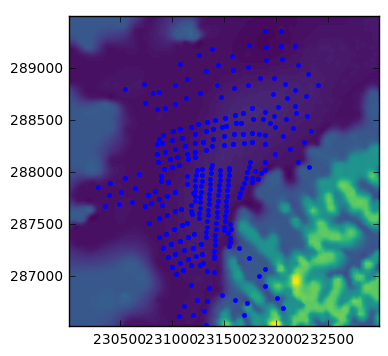

In [11]:
actinds = (data[:,0] > 230281) & (data[:,1] > 286500)
Utils.plot2Ddata(topo[:,:2], topo[:,2], ncontour=100, contourOpts={"cmap":"viridis"})
plt.plot(data[actinds,0], data[actinds,1], '.')

(<matplotlib.contour.QuadContourSet at 0x113aaa890>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1133160d0>)

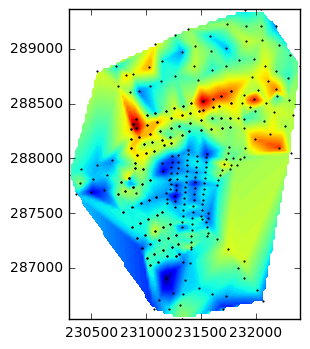

In [12]:
Utils.plot2Ddata(data[actinds,:2], data[actinds,2], ncontour=100, contourOpts={"cmap":"jet"}, dataloc=True)

In [62]:
topoInv = np.c_[topo[:,0]-np.median(data[actinds,0]), topo[:,1]-np.median(data[actinds,1]), topo[:,2]-topo[:,2].max()]
dataInv = np.c_[data[actinds,0]-np.median(data[actinds,0]), data[actinds,1]-np.median(data[actinds,1]), data[actinds,2]]

(<matplotlib.contour.QuadContourSet at 0x125729690>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11bad1350>)

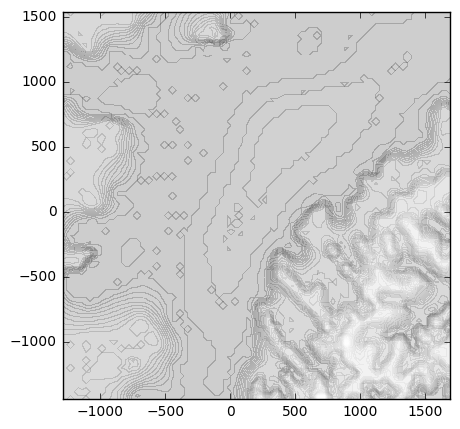

In [78]:
fig = plt.figure(figsize = (5,5))
ax = plt.subplot(111)
Utils.plot2Ddata(topoInv[:,:2], topoInv[:,2], ncontour=50, ax=ax, contourOpts={"cmap":"binary_r", "alpha":0.2})
# Utils.plot2Ddata(dataInv[:,:2], dataInv[:,2], ncontour=100, contourOpts={"cmap":"jet", "alpha":0.6}, dataloc=True, ax=ax)

In [87]:
dx = 40.
dz = 20.
npad = 3
hxind = [(dx, npad, -1.3), (dx, 50), (dx, npad, 1.3)]
hyind = [(dx, npad, -1.3), (dx, 50), (dx, npad, 1.3)]
hzind = [(dx, npad, -1.3), (dz, 10), (dz/2., 20)]
mesh = Mesh.TensorMesh([hxind, hyind, hzind], "CCN")
sigma = np.ones(mesh.nC)*1./100.
actind = Utils.surface2ind_topo(mesh, topoInv)
actMap = Maps.InjectActiveCells(mesh, actind, 0.)

(3136, 33)


In [88]:
print mesh

  ---- 3-D TensorMesh ----  
   x0: -1207.48
   y0: -1207.48
   z0: -607.48
  nCx: 56
  nCy: 56
  nCz: 33
   hx: 87.88, 67.60, 52.00, 50*40.00, 52.00, 67.60, 87.88
   hy: 87.88, 67.60, 52.00, 50*40.00, 52.00, 67.60, 87.88
   hz: 87.88, 67.60, 52.00, 10*20.00, 20*10.00


In [89]:
actind = Utils.surface2ind_topo(mesh, topoInv, gridLoc="N")

In [90]:
actind.sum()

77955

(<matplotlib.collections.QuadMesh at 0x128243fd0>,
 <matplotlib.lines.Line2D at 0x1281490d0>)

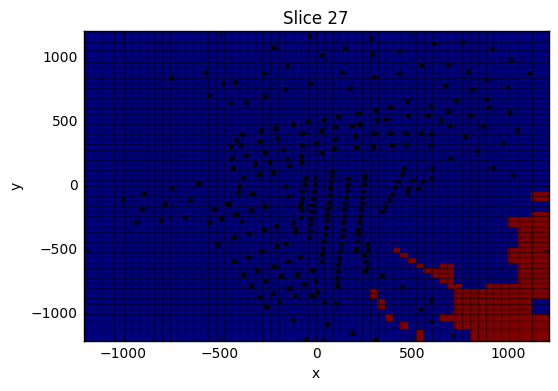

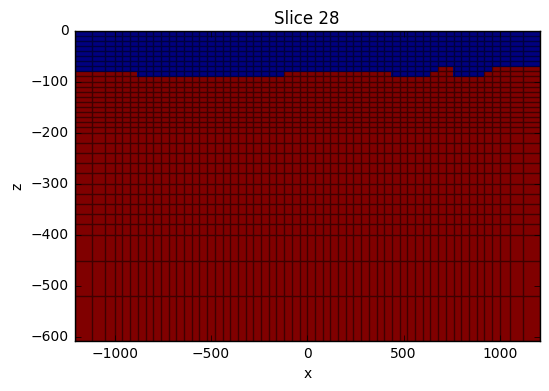

In [98]:

mesh.plotSlice(actind, normal="Z", ind=27, grid=True)
plt.plot(dataInv[:,0], dataInv[:,1], 'k.')
mesh.plotSlice(actind, normal="Y", grid=True)

In [92]:
mesh.writeVTK("pohang", models={"sigam":actind*1.})